In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving spam.csv to spam.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5055,ham,Goodnight da thangam I really miss u dear.,NaN,NaN,NaN
5012,ham,"Uncle G, just checking up on you. Do have a re...",NaN,NaN,NaN
2349,ham,Yar else i'll thk of all sorts of funny things.,NaN,NaN,NaN
3719,ham,"Yeah why not, is the gang all ready",NaN,NaN,NaN
4234,spam,FREEMSG: Our records indicate you may be entit...,NaN,NaN,NaN


In [ ]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
1158,ham,Hey! There's veggie pizza... :/,NaN,NaN,NaN
1317,spam,Win the newest ÛÏHarry Potter and the Order o...,NaN,NaN,NaN
2817,ham,Thk some of em find wtc too far... Weiyi not g...,NaN,NaN,NaN
2926,ham,Ok... U enjoy ur shows...,NaN,NaN,NaN
1991,ham,No other Valentines huh? The proof is on your ...,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#missing values
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 5)

In [ ]:
#EDA
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

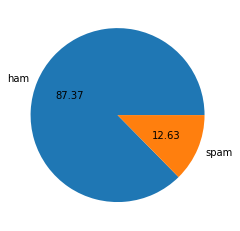

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [ ]:
df['num_characters'] = df['text'].apply(len) 

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [ ]:
#num of words
df['text'].apply(lambda x:nltk.wordpunct_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, don, ', t, think, he, goes, to, usf, ...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
df['num_words'] = df['text'].apply(lambda x:nltk.wordpunct_tokenize(x))

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,"[Nah, I, don, ', t, think, he, goes, to, usf, ..."


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,"[Nah, I, don, ', t, think, he, goes, to, usf, ...",1


In [ ]:
df[['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,5169.000000,5169.000000
mean,78.977945,1.947185
std,58.236293,1.362406
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,28.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.799601
std,56.358207,1.278465
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,28.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,653.000000,653.000000
mean,137.891271,2.967841
std,30.137753,1.483201
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,8.000000


In [ ]:
import seaborn as sns

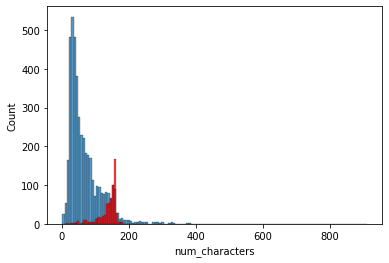

In [ ]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

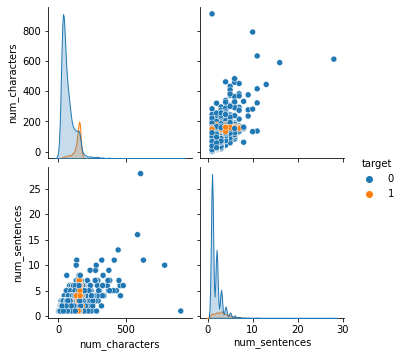

In [ ]:
sns.pairplot(df,hue = 'target')

In [ ]:
df.corr()

,target,num_characters,num_sentences
target,1.000000,0.384717,0.284901
num_characters,0.384717,1.000000,0.638143
num_sentences,0.284901,0.638143,1.000000


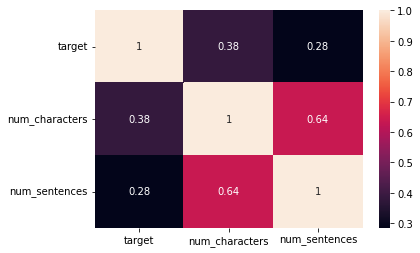

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
#Data preprocessing
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)   

  return y    
  

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text('Hi how Are you %% eg')

['hi', 'how', 'are', 'you', 'eg']

In [ ]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,"[Nah, I, don, ', t, think, he, goes, to, usf, ...",1,"[nah, i, do, think, he, goes, to, usf, he, liv..."


In [ ]:
 df[df['target'] == 1]

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,148,"[FreeMsg, Hey, there, darling, it, ', s, been,...",4,"[freemsg, hey, there, darling, it, been, 3, we..."
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,158,"[WINNER, !!, As, a, valued, network, customer,...",5,"[winner, as, a, valued, network, customer, you..."
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,154,"[Had, your, mobile, 11, months, or, more, ?, U...",3,"[had, your, mobile, 11, months, or, more, u, r..."
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,136,"[SIX, chances, to, win, CASH, !, From, 100, to...",3,"[six, chances, to, win, cash, from, 100, to, p..."
...,...,...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,90,"[Want, explicit, SEX, in, 30, secs, ?, Ring, 0...",3,"[want, explicit, sex, in, 30, secs, ring, 0207..."
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,160,"[ASKED, 3MOBILE, IF, 0870, CHATLINES, INCLU, I...",6,"[asked, 3mobile, if, 0870, chatlines, inclu, i..."
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,160,"[Had, your, contract, mobile, 11, Mnths, ?, La...",5,"[had, your, contract, mobile, 11, mnths, lates..."
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,147,"[REMINDER, FROM, O2, :, To, get, 2, ., 50, pou...",1,"[reminder, from, o2, to, get, pounds, free, ca..."


In [ ]:
 df[df['target'] == 0]

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,"[ok, lar, joking, wif, u, oni]"
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,"[Nah, I, don, ', t, think, he, goes, to, usf, ...",1,"[nah, i, do, think, he, goes, to, usf, he, liv..."
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,77,"[Even, my, brother, is, not, like, to, speak, ...",2,"[even, my, brother, is, not, like, to, speak, ..."
...,...,...,...,...,...,...,...,...,...
5565,0,Huh y lei...,NaN,NaN,NaN,12,"[Huh, y, lei, ...]",1,"[huh, y, lei]"
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",1,"[will, b, going, to, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",2,"[pity, was, in, mood, for, that, so, any, othe..."
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125,"[The, guy, did, some, bitching, but, I, acted,...",1,"[the, guy, did, some, bitching, but, i, acted,..."


In [ ]:
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
ham_words = ''
spam_words = ''

In [ ]:
# Creating a corpus of spam messages
for val in df[df['target'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in df[df['text'] == 'ham'].text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

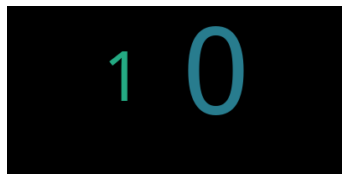

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df_real = df[df['target']==1]
df_fake = df[df['target']==0]
from wordcloud import WordCloud 

counts = df['target'].value_counts()
counts.index = counts.index.map(str)
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df = df.replace(['target','text'],[0, 1])
df.head(10)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,"[Nah, I, don, ', t, think, he, goes, to, usf, ...",1,"[nah, i, do, think, he, goes, to, usf, he, liv..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,148,"[FreeMsg, Hey, there, darling, it, ', s, been,...",4,"[freemsg, hey, there, darling, it, been, 3, we..."
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,77,"[Even, my, brother, is, not, like, to, speak, ...",2,"[even, my, brother, is, not, like, to, speak, ..."
7,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160,"[As, per, your, request, ', Melle, Melle, (, O...",2,"[as, per, your, request, melle, oru, minnaminu..."
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,158,"[WINNER, !!, As, a, valued, network, customer,...",5,"[winner, as, a, valued, network, customer, you..."
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,154,"[Had, your, mobile, 11, months, or, more, ?, U...",3,"[had, your, mobile, 11, months, or, more, u, r..."


In [ ]:
#LSTM
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 377s 957ms/step - loss: 0.4591 - accuracy: 0.7768 - val_loss: 0.4250 - val_accuracy: 0.8034
Epoch 2/3
391/391 [==============================] - 361s 925ms/step - loss: 0.3072 - accuracy: 0.8752 - val_loss: 0.3045 - val_accuracy: 0.8747
Epoch 3/3
391/391 [

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.82%
